#  Level 1 - Task 3: Geospatial Analysis

# Overview of Problem Statement

With thousands of restaurants listed across various geographic regions, it is important to analyze the spatial distribution of these restaurants using geographic coordinates (latitude and longitude). This helps identify regional clusters, underserved locations, and potential correlations between location and customer ratings.



#  Objective

1.To visualize restaurant locations on an interactive map using latitude and longitude data.

2.To analyze the geographical distribution of restaurants across cities and countries.

3.To explore any correlation between restaurant locations and their aggregate ratings using spatial scatter plots.



# Importing necessary libraries

In [1]:
##  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

#  Data collection

In [2]:
##  Load Dataset
df = pd.read_csv("Dataset .csv")
df.dropna(subset=['Cuisines'], inplace=True)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#  Visualize Restaurant Locations on Map

In [3]:
##  Visualize Restaurant Locations on Map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)

In [4]:
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name']
    ).add_to(marker_cluster)

In [5]:
m.save("restaurant_map.html")
print(" Map saved as restaurant_map.html")

 Map saved as restaurant_map.html


#  Distribution of Restaurants Across Cities

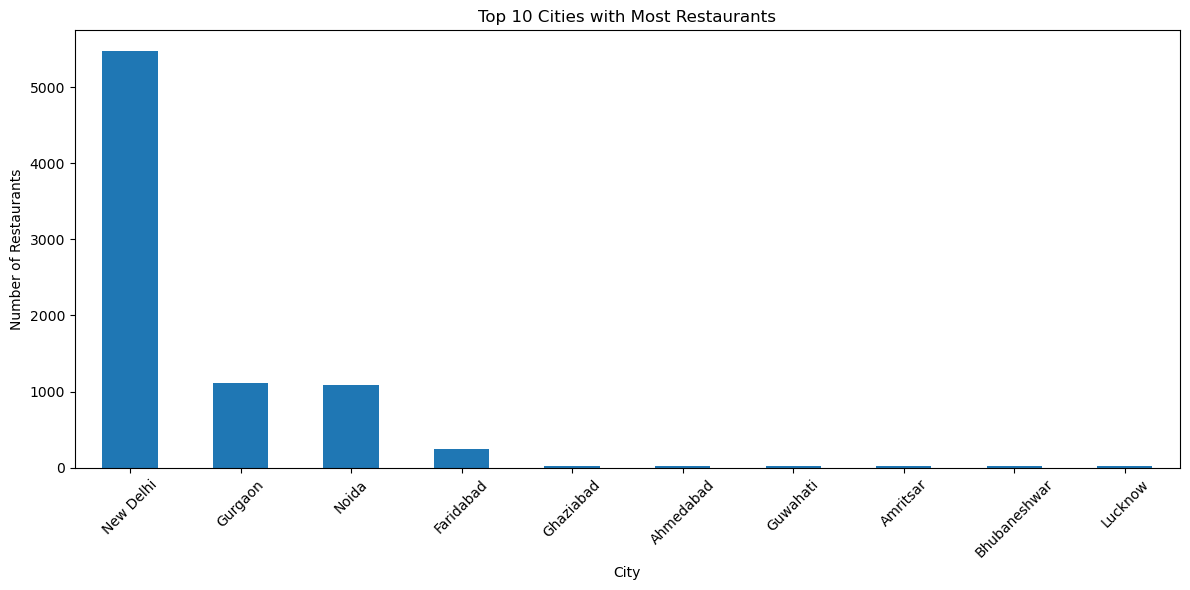

In [6]:
##  Distribution of Restaurants Across Cities
plt.figure(figsize=(12,6))
df['City'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Cities with Most Restaurants")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Correlation Between Location and Rating

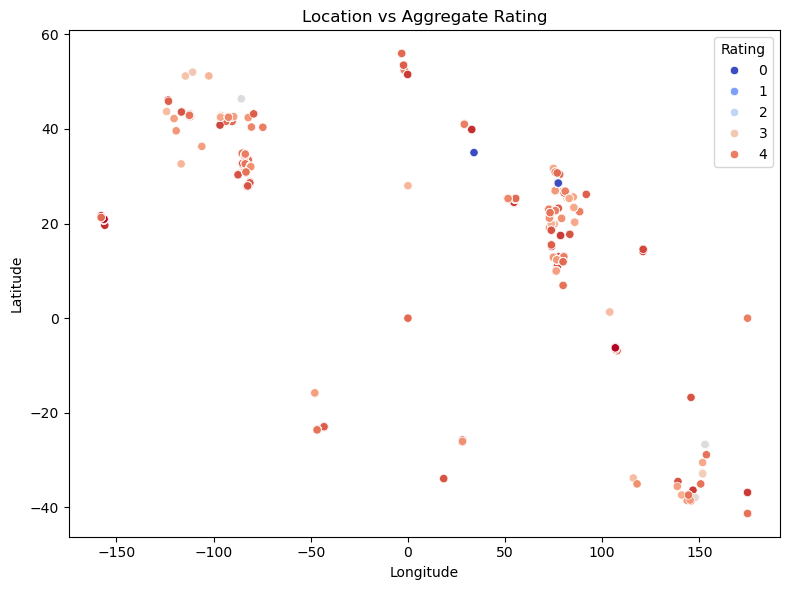

In [7]:
##  Correlation Between Location and Rating
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Aggregate rating', palette='coolwarm')
plt.title("Location vs Aggregate Rating")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

# Conclusion


1.An interactive map was successfully generated using Folium with over 9,000 valid restaurant entries.

2.The highest concentration of restaurants was observed in Indian cities like New Delhi, Gurgaon, Noida, and Bangalore, confirming strong urban coverage in the dataset.

3.A scatter plot of longitude vs latitude colored by aggregate rating showed no strong visual correlation between geographic location and customer rating, suggesting location alone does not drive rating trends.

4.This geospatial analysis enables better understanding of market saturation, and can help food businesses target underrepresented areas for expansion.

